In [12]:
import pandas as pd 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
att = np.array(pd.read_csv('data/attributes.csv'))
att

array([[0, 'l'],
       [1, 'x'],
       [2, 'x'],
       ...,
       [1497, 'l'],
       [1498, 'f'],
       [1499, 'l']], dtype=object)

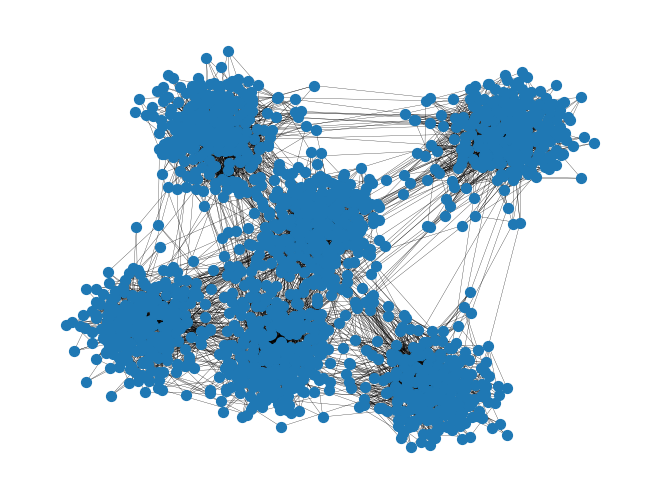

In [14]:
G = nx.read_edgelist('data/edges_train.edgelist', data=False, delimiter=',', nodetype=int)
nx.draw(G, node_size=50, width=0.2)

In [15]:
G.number_of_nodes(), G.number_of_edges()

(1500, 6600)

#### setting:
we have an edgelist containing 6600 links of 1500 nodes and an attribute list containing 1500 nodes with a corresponding level of a categorical attribute variable.
#### aim:
predict the missing links -> should amount to being 7333 links

# Implementation of all possible Link Prediction metrics from networkx
ADD ALL NEW FEATURES TO GETFEATURES

In [26]:
# Input: getFeature(graph, node_i, node_j)
def getFeatures(G, i, j):
    # ressource allocation index
    ra = list(nx.resource_allocation_index(G, [(i, j)]))[0][2]
    
    # jaccard coefficient
    jc = list(nx.jaccard_coefficient(G, [(i, j)]))[0][2]
    
    # adamic adar index
    aa = list(nx.adamic_adar_index(G, [(i, j)]))[0][2]
    
    # preferential attachment
    pa = list(nx.preferential_attachment(G, [(i, j)]))[0][2]
    
    # #common neighbors soundarajan hopcroft
    # sh = list(nx.cn_soundarajan_hopcroft(G, [(i, j)]))[0][2]

    # #ra index soundarajan hopcroft
    # rai = list(nx.ra_index_soundarajan_hopcroft(G, [(i, j)]))[0][2]

    # #within inter cluster
    # wic = list(nx.within_inter_cluster(G, [(i, j)]))[0][2]

    # amou8nt of common neighbors -> TODO: same as soundarajan hopcroft????
    cn = len(list(nx.common_neighbors(G, i, j)))

    # check if the nodes are in the same cluster
    att_same = 1 if att[i][1] == att[j][1] else 0


    return [ra, jc, aa, pa, cn, att_same]

In [27]:
# check if att_same works
att[2][1] == att[0][1]

False

the idea is to create features for all current 

In [28]:
X_train = []
y_train = []

for (i, j) in G.edges:
    X_train.append(getFeatures(G, i, j))
    y_train.append(1)

solInput = pd.read_csv('data/solutionInput.csv')
for kk in range(len(X_train)):
    # set length of 0s to modify ratio (currently set to 1:1)
    length_of_0s = len(att)

    i = np.random.randint(length_of_0s)
    j = np.random.randint(length_of_0s)

    # check if edge already exists -> should be yes
    # check if i and j are the same -> no edge to itself
    # check if i and j are in the solution set/x_test -> should not be set to anything to avoid distorting the solution
    while (i, j) in G.edges or i == j or (i in solInput['int1'] and j in solInput['int2']):
        i = np.random.randint(length_of_0s)
        j = np.random.randint(length_of_0s)

    X_train.append(getFeatures(G, i, j))
    y_train.append(0)

In [29]:
num_rows = len(X_train)
num_cols = len(X_train[0]) if X_train else 0
print(f"Dimensions of features: {num_rows} rows, {num_cols} columns")

Dimensions of features: 13200 rows, 6 columns


In [30]:
X_train

[[1.5303718734300502, 0.16326530612244897, 6.708297891408716, 3168, 16, 0],
 [0.22348484848484845, 0.046153846153846156, 1.1220111034358629, 960, 3, 0],
 [1.4982719177841128, 0.14423076923076922, 6.434748690039283, 3408, 15, 0],
 [0.352569355527102, 0.09523809523809523, 2.054963393280795, 1008, 6, 0],
 [0.8582042761620226, 0.12658227848101267, 3.9609285722908103, 1968, 10, 0],
 [0.1461038961038961, 0.057971014492753624, 1.1949641953346215, 1200, 4, 0],
 [0.37467532467532466, 0.07692307692307693, 1.8935498449803359, 1056, 5, 0],
 [0.31787238583013233, 0.08620689655172414, 1.7673165915317286, 720, 5, 0],
 [0.4810569105691057, 0.0684931506849315, 2.1048613507607854, 1440, 5, 0],
 [0.015151515151515152, 0.01694915254237288, 0.23868315209103041, 576, 1, 0],
 [0.9327235772357724, 0.09090909090909091, 3.450909744991311, 1728, 7, 0],
 [0.03847475094469255, 0.03571428571428571, 0.5038767137860016, 480, 2, 0],
 [0.5384848484848485, 0.07936507936507936, 2.1944500928719046, 960, 5, 0],
 [0.0990808

In [31]:
X_test = []
X_test = [getFeatures(G, i, j) for i, j in zip(solInput['int1'], solInput['int2'])]
X_test

[[0, 0.0, 0, 30, 0, 0],
 [0.18553459119496854, 0.04878048780487805, 0.809981275302947, 222, 2, 1],
 [0, 0.0, 0, 49, 0, 0],
 [0, 0.0, 0, 105, 0, 0],
 [0, 0.0, 0, 35, 0, 1],
 [0, 0.0, 0, 50, 0, 0],
 [0.09866220735785954, 0.06451612903225806, 0.6510605018155042, 200, 2, 0],
 [1.0626373626373626, 0.12195121951219512, 4.389329668920727, 2052, 10, 0],
 [0, 0.0, 0, 30, 0, 0],
 [0.25, 0.02127659574468085, 0.7213475204444817, 432, 1, 0],
 [0.05555555555555555, 0.1111111111111111, 0.3459762562611936, 21, 1, 1],
 [0.07692307692307693, 0.01694915254237288, 0.3898712452512801, 675, 1, 1],
 [0.39285714285714285, 0.03225806451612903, 1.2352458628142324, 1008, 2, 1],
 [0.125, 0.04, 0.48089834696298783, 69, 1, 1],
 [0, 0.0, 0, 24, 0, 1],
 [0, 0.0, 0, 24, 0, 0],
 [0, 0.0, 0, 25, 0, 0],
 [0, 0.0, 0, 40, 0, 0],
 [0, 0.0, 0, 91, 0, 0],
 [0, 0.0, 0, 56, 0, 1],
 [0.02127659574468085, 0.05555555555555555, 0.25973030217227155, 60, 1, 1],
 [0, 0.0, 0, 96, 0, 0],
 [0.08333333333333333, 0.03333333333333333, 0.402

In [32]:
pd.DataFrame(X_test).to_csv('data/X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('data/y_train.csv', index=False)
pd.DataFrame(X_train).to_csv('data/X_train.csv', index=False)